In [4]:
from gapcv.vision import Image, Images
from keras.callbacks import LambdaCallback
import cv2

Using TensorFlow backend.


In [5]:
import os
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [6]:
import keras
from keras.applications.vgg16 import VGG16
from keras import backend as K
from keras.models import Sequential, load_model
from keras.layers import activations, BatchNormalization
from keras.layers.core import Flatten, Dense, Dropout
from keras.optimizers import SGD, Adam
from keras.metrics import categorical_crossentropy
from keras import regularizers
from keras.layers.convolutional import *
from keras.callbacks import ModelCheckpoint

In [63]:
images = Images('chinese/ch_train_set/',num_proc='all',config=['nostore','gray'],name='chinese')

In [8]:
def convert_size(row):
    if row == 0:
        return "0B"
    size_name = ("B", "KB", "MB", "GB", "TB", "PB", "EB", "ZB", "YB")
    i = int(math.floor(math.log(row, 1024)))
    p = math.pow(1024, i)
    s = round(row / p, 2)
    return "{} {}".format(s, size_name[i])

In [9]:
images[1]

In [10]:
images[0].image

'chinese/ch_train//a440/a440-chuxi_002.png'

In [59]:
dict_list={i:{'img_class':img.image.split('/')[-2],
              'image':img.image.split('/')[-1],
              'script':img.image.split('_')[1].split('-')[1],
              'label':img.label,
              'name':img.name,
              'rawshape':img.rawshape,
              'ressize':img.ressize,
              'size':img.size,
              'shape':img.shape,
              'type':img.type
             } for i, img in enumerate(images._data)}

# get data frame
train_set=pd.DataFrame(dict_list).T

# fixed data types
train_set['size'] = train_set['size'].astype('int')

train_set['size_max']=train_set['size']
train_set['size_min']=df['size']
train_set.head(3)

,image,img_class,label,name,rawshape,ressize,script,shape,size,type,size_max,size_min
0,a440-chuxi_002.png,a440,0,a440-chuxi_002,"(65, 79)",0,chuxi,"(65, 79)",153,png,153,153
1,a440-chuxi_001.png,a440,0,a440-chuxi_001,"(65, 79)",0,chuxi,"(65, 79)",166,png,166,166
2,a440-chuxi_005.png,a440,0,a440-chuxi_005,"(65, 79)",0,chuxi,"(65, 79)",157,png,157,157


In [60]:
train_set_grouped=train_set.pivot_table(index=['label','type','shape','img_class','script'],
                   values=['image','size_max','size','size_min'],
                   aggfunc={'image':len,'size_max':max,'size':np.mean,'size_min':min}
                  )

train_set_grouped.reset_index(inplace=True)

train_set_grouped.rename(columns={'size':'size_avg', 'time':'time_avg'}, inplace = True)
train_set_grouped['size_avg']=train_set_grouped.apply(lambda row: convert_size(row['size_avg']), axis=1)
train_set_grouped['size_max']=train_set_grouped.apply(lambda row: convert_size(row['size_max']), axis=1)
train_set_grouped['size_min']=train_set_grouped.apply(lambda row: convert_size(row['size_min']), axis=1)
train_set_grouped.head()

,label,type,shape,img_class,script,image,size_avg,size_max,size_min
0,0,png,"(65, 79)",a440,chuxi,219,161.65 B,223.0 B,130.0 B
1,0,png,"(65, 79)",a440,jinwen,15,135.53 B,171.0 B,96.0 B
2,0,png,"(65, 79)",a440,smallseal,2,165.5 B,231.0 B,100.0 B
3,1,png,"(65, 79)",a447,chuxi,171,205.74 B,315.0 B,174.0 B
4,1,png,"(65, 79)",a447,jinwen,22,172.36 B,216.0 B,135.0 B


In [61]:
train_set_grouped['img_class'].values

array(['a440', 'a440', 'a440', 'a447', 'a447', 'a447', 'a448', 'a448',
       'a448', 'a44a', 'a44a', 'a44a', 'a451', 'a451', 'a451', 'a453',
       'a453', 'a453', 'a454', 'a454', 'a454', 'a455', 'a455', 'a455',
       'a455', 'a457', 'a457', 'a457', 'a457', 'a45d', 'a45d', 'a45f',
       'a45f', 'a45f', 'a464', 'a464', 'a464', 'a466', 'a466', 'a467',
       'a467', 'a467', 'a46a', 'a46a', 'a46a', 'a46b', 'a46b', 'a46b',
       'a46c', 'a46c', 'a46c', 'a46c', 'a470', 'a470', 'a473', 'a473',
       'a473', 'a474', 'a474', 'a474', 'a475', 'a475', 'a475', 'a476',
       'a476', 'a476', 'a477', 'a4a3', 'a4a3', 'a4a3', 'a4a4', 'a4a4',
       'a4a4', 'a4a4', 'a4a7', 'a4a7', 'a4a7', 'a4bd', 'a4bd', 'a4bd',
       'a4c0', 'a4c0', 'a4c0', 'a4c6', 'a4c6', 'a4ce', 'a4ce', 'a4ce',
       'a4ce', 'a4d1', 'a4d1', 'a4d1', 'a4d2', 'a4d2', 'a4d2', 'a4e2',
       'a4e2', 'a4e5', 'a4e5', 'a4e5', 'a4e8', 'a4e8', 'a4e8', 'a4e8',
       'a4e9', 'a4e9', 'a4e9', 'a4e9', 'a4eb', 'a4eb', 'a4eb', 'a4ec',
      

In [14]:
n,c = df2['label'].values, df2['image'].values

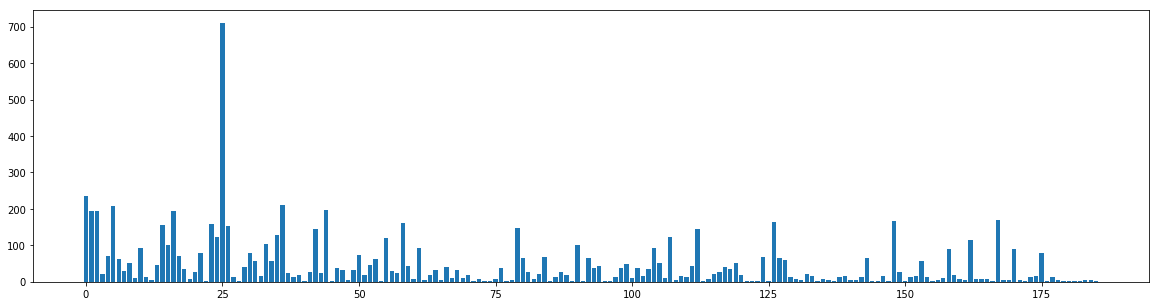

In [15]:
plt.figure(figsize=(20,5))
plt.bar(n,c)
plt.show()

In [16]:
images.split = 0.2
X_train, X_test, Y_train, Y_test = images.split

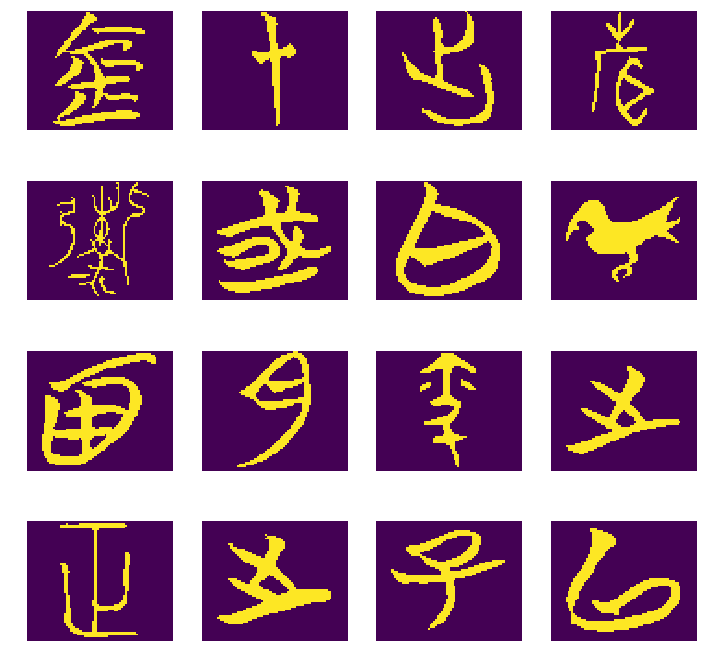

In [17]:
fig=plt.figure(figsize=(12, 12))
columns = 4
rows = 4
for i in range(1, columns*rows +1):
    img_show=X_train[i]
    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.imshow(img_show)
plt.show()

### My Model for Keras (different shape)

In [19]:
X_train,X_test = X_train.reshape(X_train.shape[0],65,79,1),X_test.reshape(X_test.shape[0],65,79,1)

In [20]:
batch_size = 64
num_classes = Y_train.shape[1]
epochs = 20
input_shape = X_train.shape[1:]

_Keras Layers template: [MNIST for Beginners](https://www.kaggle.com/adityaecdrid/mnist-with-keras-for-beginners-99457)_

In [21]:
from keras.callbacks import Callback

In [22]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',kernel_initializer='RandomNormal',input_shape=(65,79,1,)))
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='RandomNormal', kernel_regularizer=regularizers.l2(0.3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.20))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same',kernel_initializer='RandomNormal', kernel_regularizer=regularizers.l2(0.3)))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same',kernel_initializer='RandomNormal', kernel_regularizer=regularizers.l2(0.2)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same',kernel_initializer='RandomNormal',kernel_regularizer=regularizers.l2(0.2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

# checkpoint
# filepath="weights-improvement-{epoch:02d}.hdf5"
# checkpoint = ModelCheckpoint(filepath, verbose=1, save_best_only=True, mode='max')
# print_weights = LambdaCallback(on_epoch_end=lambda batch, logs: print(model.layers[0].get_weights()))

# callbacks_list = [checkpoint]



model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])

In [23]:
model.fit(X_train,Y_train,epochs=3)

Epoch 1/3
6712/6712 [==============================] - 185s 28ms/step - loss: 15.5054 - acc: 0.3269
Epoch 2/3
6712/6712 [==============================] - 194s 29ms/step - loss: 4.1833 - acc: 0.4388
Epoch 3/3
6712/6712 [==============================] - 182s 27ms/step - loss: 3.9062 - acc: 0.4924


In [24]:
model.evaluate(X_test,Y_test)

1679/1679 [==============================] - 15s 9ms/step


[4.157112616311233, 0.47349612877225505]

In [25]:
prediction_set = Images('chinese/ch_test/', config=['nostore','gray'])
final_images = np.array([im._imgdata.reshape(65,79,1) for im in prediction_set._data[:]])
final_labels = np.array([im.name for im in prediction_set])
pred = model.predict(final_images)

In [26]:
actual_labels = df2['img_class'].values
actual_label = [prediction_set[i].name for i in range(len(prediction_set))]
pred_label = [final_labels[p.argmax()] for p in pred]

In [27]:
v = 0
for i in range(20):
    if actual_label[i] == pred_label[i]:
        v+=1
        print('{}: CORRECT!'.format(i))
    else:
        print('{}: WRONG!'.format(i))
# print(v,v/200)

0: CORRECT!
1: WRONG!
2: WRONG!
3: WRONG!
4: WRONG!
5: WRONG!
6: WRONG!
7: WRONG!
8: WRONG!
9: WRONG!
10: WRONG!
11: WRONG!
12: WRONG!
13: WRONG!
14: WRONG!
15: WRONG!
16: WRONG!
17: WRONG!
18: WRONG!
19: WRONG!


In [28]:
im=Image('chinese/19981.gif',config=['resize=(65,79)','gray'])
im = im.data.reshape(65,79,1)
im = np.expand_dims(im,axis=0)
pred = model.predict(im).argmax()
actual_labels[pred]

'a55b'

In [29]:
im=Image('chinese/a4a3-real.jpg',config=['resize=(65,79)','gray'])
im = im.data.reshape(65,79,1)
im = np.expand_dims(im,axis=0)
pred = model.predict(im).argmax()
actual_labels[pred]

'a9fa'